# LSTM

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
!nvidia-smi -L
print(f'Tensorflow version: {tf.__version__}')

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)
Tensorflow version: 2.3.1


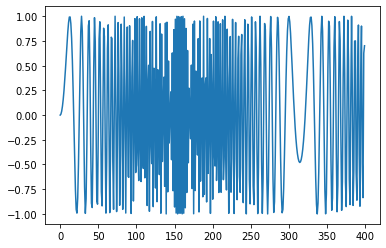

In [3]:
series = np.sin((0.1 * np.arange(400)) ** 2)
plt.plot(series)
plt.show()

T = 10
D = 1
X = []
y = []
for t in range(len(series) - T):
    X.append(series[t:t + T])
    y.append(series[t + T])
X = np.asarray(X).reshape(-1, T, D)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

Epoch 1/200
7/7 [==============================] - 0s 51ms/step - loss: 0.5181 - val_loss: 0.6748
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 0.5223 - val_loss: 0.6059
Epoch 3/200
7/7 [==============================] - 0s 4ms/step - loss: 0.4858 - val_loss: 0.5392
Epoch 4/200
7/7 [==============================] - 0s 4ms/step - loss: 0.4157 - val_loss: 0.4843
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 0.3297 - val_loss: 0.3499
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 0.2364 - val_loss: 0.3035
Epoch 7/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1942 - val_loss: 0.2422
Epoch 8/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1436 - val_loss: 0.1512
Epoch 9/200
7/7 [==============================] - 0s 4ms/step - loss: 0.1180 - val_loss: 0.1680
Epoch 10/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0826 - val_loss: 0.1323
Epoch 11/200
7/7 [==========

7/7 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0493
Epoch 85/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0593
Epoch 86/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0533
Epoch 87/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0655
Epoch 88/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0489
Epoch 89/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0693
Epoch 90/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0544
Epoch 91/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0624
Epoch 92/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0568
Epoch 93/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0015 - val_loss: 0.0645
Epoch 94/200
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.0913
Epoch 168/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0067 - val_loss: 0.0523
Epoch 169/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0624
Epoch 170/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0439
Epoch 171/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0552
Epoch 172/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0437
Epoch 173/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0507
Epoch 174/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0031 - val_loss: 0.0414
Epoch 175/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0417
Epoch 176/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0012 - val_loss: 0.0414
Epoch 177/200
7/7 [=====

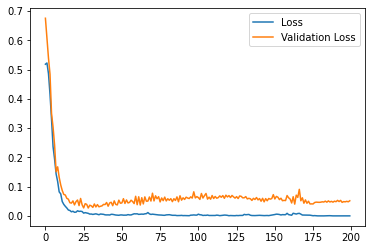

In [4]:
i = tf.keras.layers.Input(shape=(T, 1))
x = tf.keras.layers.LSTM(10)(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(i, x)

model.compile(optimizer=tf.keras.optimizers.Adam(0.05),
              loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              batch_size=32,
              epochs=200)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

## One-step forecast

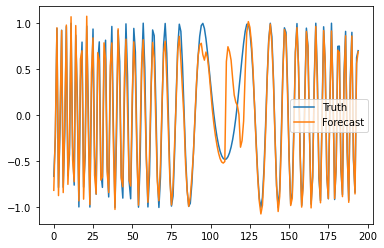

In [5]:
forecast = []
for i in range(len(y_test)):
    p = model.predict(X_test[i].reshape(1, T, D))[0, 0]
    forecast.append(p)

plt.plot(y_test, label='Truth')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

## Multi-step forecast

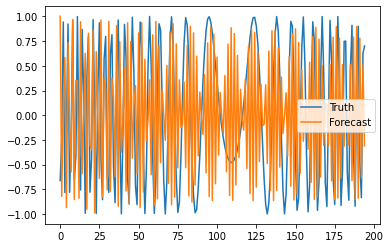

In [6]:
forecast = []
last_x = X_train[-1]
for i in range(len(y_test)):
    p = model.predict(last_x.reshape(1, T, D))[0, 0]
    forecast.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

plt.plot(y_test, label='Truth')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()